In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('data.csv', sep=';')

In [4]:
data.head()

,ID,Question
0,1,Как зовут лодочника на реке Стикс в древнегреч...
1,2,Как в химии обозначается свинец?
2,3,Какой химический элемент преобладает в составе...
3,4,Кто из перечисленных был пажом во времена Екат...
4,5,Когда началась 2 мировая война?


In [7]:
answer = pd.read_csv('train.csv', sep=';')

In [8]:
answer.head()

,ID,Answer
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


In [9]:
df = pd.merge(data, answer)

In [13]:
df.head()

,ID,Question,Answer
0,1,Как зовут лодочника на реке Стикс в древнегреч...,0
1,2,Как в химии обозначается свинец?,1
2,3,Какой химический элемент преобладает в составе...,0
3,4,Кто из перечисленных был пажом во времена Екат...,0
4,5,Когда началась 2 мировая война?,0


In [12]:
df.Answer.sum() / df.shape[0]

0.10386666666666666

In [21]:
lens = df.Question.apply(len)

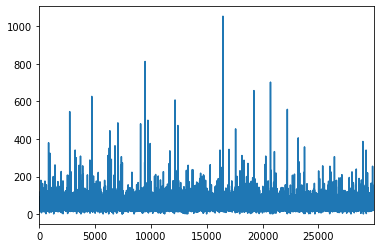

In [19]:
lens.plot()

In [20]:
df.Question.apply(len).max()

1054

In [23]:
(lens > 400).sum()

15

In [24]:
df['lens'] = lens

In [47]:
df.shape

(30000, 4)

In [25]:
df.head()

,ID,Question,Answer,lens
0,1,Как зовут лодочника на реке Стикс в древнегреч...,0,62
1,2,Как в химии обозначается свинец?,1,32
2,3,Какой химический элемент преобладает в составе...,0,62
3,4,Кто из перечисленных был пажом во времена Екат...,0,55
4,5,Когда началась 2 мировая война?,0,31


In [42]:
n1 = df[(df.lens > 0) & (df.lens <= 50)].Answer.sum() / df.Answer.sum()

In [43]:
n2 = df[(df.lens > 50) & (df.lens <= 100)].Answer.sum() / df.Answer.sum()

In [44]:
print(n1)
print(n2)
n1 + n2

0.5125160462130937
0.4746469833119384


0.987163029525032

In [36]:
df[(df.lens > 100)].Answer.sum() / df.Answer.sum()

0.012836970474967908

In [46]:
(df.lens > 100).sum()

997

In [48]:
df_less50 = df[(df.lens > 0) & (df.lens <= 50)]

In [51]:
df_less100 = df[(df.lens > 50) & (df.lens <= 100)]

In [50]:
df_less50.Answer.sum() / df_less50.shape[0]

0.09134587885374364

In [52]:
df_less100.Answer.sum() / df_less100.shape[0]

0.12838541666666667

In [28]:
df[['Answer', 'lens']].corr()

,Answer,lens
Answer,1.000000,0.019922
lens,0.019922,1.000000


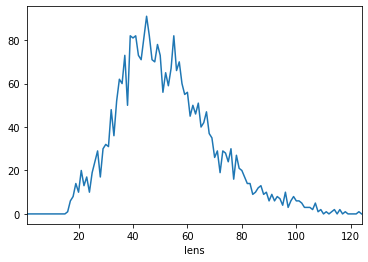

In [68]:
df[lens < 125].groupby(['lens']).Answer.sum().plot()

In [58]:
df.groupby(['lens']).Answer.sum().values.argmax()

44

In [79]:
df[(df.lens >= 38) & (df.lens <= 100)].Answer.sum() / df[df.Answer == 1].shape[0]

0.7907573812580231

In [67]:
df[lens > 125].Answer.sum()

2

In [81]:
df[(df.lens >= 40) & (df.lens <= 100)].shape[0] / df.shape[0]

0.6183666666666666

In [75]:
df_group = df[lens < 100].groupby(['lens'])

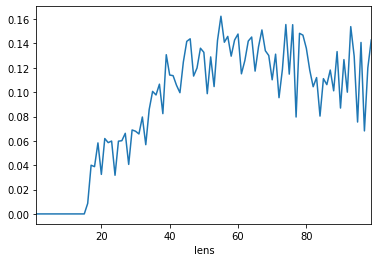

In [76]:
(df_group.Answer.sum() / df_group.size()).plot()